In [13]:
from __future__ import division
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Metody řešení počátečních úloh ODE

S nutností řešit obyčejné diferenciální rovnice se teoretický astrofyzik prakticky každodenně. Jak už totakv životě bývá, šance na nalezení analytického řešení je velmi mála, reálné úlohy se svojí komplikovaností liší od učebnicových příkladů a mnohdy si nevystačíme ani s aproximací úlohy na co nejjednodušší. Nezbývá nic jiného než přistoupit k redukci úlohy ma numerický problém, nalezení jeho řešení s odpovídající přesností a případným omezením vyplývajícím z redukce na numerický problém.

## Eulerova metoda
Předpokládejme, že máme zadanou *Cauchyho počáteční úlohu*, kterou chceme vyřešit na intervalu $(t_o,t_{\rm end})$ s počáteční podmínmkou $y_0$

$$
\frac{{\rm d}y}{{\rm d}x} = f(t,y)\quad t_0 \leq t \leq t_{\rm end} \quad y(t_0) = y_0
$$

Nejjednodušší způsob řešení spočívá ve vytvoření diskrétní reprezentace nezávislé veličiny $t$ v daném intervalu, v našem případě ekvidistantní sítí bodů $t \in \{t_0,t_1,t_2,\dots,t_{\rm end}\}$, pro které platí vztah

$$
t_i = t_0 + ih, \quad \text{kde}\, i = 1,2,3, \dots N
$$

kde jsme provedli přeznačení $t_{\rm end} = t_{N}$. V dalším kroku s pomocí této diskrétní reprezentace určíme aproximativně derivaci a to s využitím Taylorova rozvoje

$$
y(t+h) = y(t)+\frac{{\rm d}y(t)}{{\rm d}t}h+\frac{{\rm d}^2 y(t)}{{\rm d}t^2}h^2+\dots
$$

zanedbáním členů druhého a vyšších řádů, můžeme derivaci aproximovat

$$
\frac{{\rm d}y}{{\rm d}t} \approx \frac{y(t+h)-y(t)}{h}
$$

jinak napsáno s použitím ekvidistantní diskrétní reprezentace pro každý krok $t_i$ je derivace

$$
\frac{{\rm d}y}{{\rm d}t}\Big\vert_{t=t_i} \approx \frac{y(t_i+h)-y(t_i)}{h}.
$$

Celý problém řešení obyčejné diferenciální rovnice lze tedy převést na iterativní postup

$$
y_{i+1} = y_{i}+hf(t_i,y_i)+\Delta{\epsilon}_{\rm local}
$$

*Lokální zaokrouhlovací chybu*, tedy chybu která vzniká v jednom iteračním kroku v důsledku použité numerické metody určíme z druhé derivace

$$
y(t+h)-y(t) = \frac{1}{2}h^2 y''(\xi)
$$

*Globální zaokrouhlovací chyba* je kumulativní efekt lokálních zaokrouhlovacích chyb, tedy chyba metody, kterou se liší skutečné řešení od numerického řešení po uplynutí dostatečného počtu iteračních kroků. Její odhad je obtížnější, zájemce lze odkázat na [Euler method error](http://www.math.unl.edu/~gledder1/Math447/EulerError)

### Postup algoritmu

* Vytvoříme $N$ prvkovou diskrétní reprezentaci nezávislé veličiny z intervalu $(t_0,t_{\rm end})$
* Převedeme všechny derivace v rovnici vystupující na jejich diskrétní aproximaci a vyjádříme závislou veličinu v iterativním tvary

$$
y_{i+1} \approx f(y_i,t_i)
$$
* Rovnici řešíme iterativně a to v zadaném intervalu $(t_0,t_N= t_{\rm end})$ s využitím počáteční podmínky $y(t_0)=y_0$

#### Příklad: 
Řešte rovnici 
$$
y' = y, \quad y(0) = 1
$$

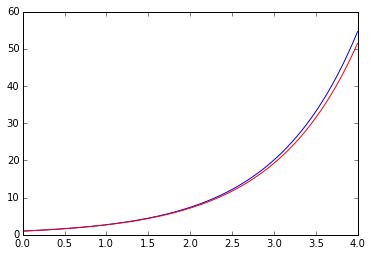

In [14]:
#Euler integrator

def euler(f, y , t, h):
    y[0] = y_0
    # Solution
    for i in range(np.size(y)-1):
        y[i+1] = y[i] +f(y[i],t[i])*h
    return y

y_0 = 1
a = 0.0
b = 4.0
N = 200
t = np.linspace(a,b,N)
h = (b-a)/N
y = np.zeros(np.size(t))

def funkce(y,t):
    return y

y_expect = np.exp(t)
y_solved = euler(funkce,y,t,h)

plt.plot(t,y_expect,'-')
plt.plot(t,y_solved,'r-')

[Runge-Kutta method](http://bender.astro.sunysb.edu/classes/phy688_spring2013/lectures/ODEs.pdf)

### Testovací problém - Keplerův problém

Uvažme těleso zanedbatelné hmotnosti obíhající kolem Slunce o hmotnosti $M$. Trajektorii tělesa dostaneme řešením newtonových pohybových rovnic, přičemž zanedbáme hmotnost obíhajícího tělesa.

$$
\vec{\dot{x}} = \vec{v} \\
\vec{\dot{v}} = -\frac{GM}{r^3}\vec{r}
$$
s pomocí *Keplerova zákona* dostaneme vztah mezi velikostí hlavní poloosy $a$ a periodou $P$. Jako vztažné jednotky zvolíme $[1\,M_{\odot}]$,$[1\,{\text{AU}}]$ a $[1\,\text{rok}]$, čehož plyne

$$
4\pi^2 a^3 = GMP^2
$$

Jako vztažné jednotky zvolíme $[1\,M_{\odot}]$,$[1\,{\text{AU}}]$ a $[1\,\text{rok}]$, důvod je jednoduchý, pro tělesa zanedbatelné hmotnosti platí,
$$
\frac{P^2}{a^3} \approx \frac{4\pi^2}{GM} = \text{const}
$$

tedy tento poměr je pro všechny planety zhruba stejný. Tedy pokud jako referenční planetu zvolíme Zemi, musí platit
$$
4\pi^2 = GM
$$

Jako počáteční podmínky zvolíme pro polohu

$$
x = 0 \\
y = a(1-e)
$$

a pro rychlosti

$$
u = -\sqrt{\frac{GM}{a}\frac{1+e}{1-e}} \\
v = 0
$$

Budeme tedy řešit soustavu differenciálních rovnic, 

$$
\dot{x} = u \\
\dot{y} = v \\
\dot{u} = -\frac{GM}{r^3}x \\
\dot{v} = -\frac{GM}{r^3}y
$$

které budeme integrovat pro zadané parametry $a = 1,e = 1$

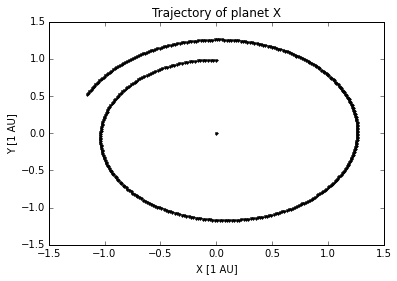

In [15]:
# Modified (set of four first order differential equation) non-optimalized Euler 

# Set of initial declaration and parameters of the problem
a = 1.0
e = 0.01
GM = 4.0*np.pi**2

N = 400
t0 = 0.0
tend = 1.5
t = np.linspace(t0,tend,N)
h = (tend-t0)/N
x = np.zeros((np.size(t),4))


# Function calculate right sides of the ODEs
def f(x_local):
    radius = np.sqrt(x_local[0]**2+x_local[1]**2)
    tau = -GM/radius**3
    return np.array([h*x_local[2],h*x_local[3],h*tau*x_local[0],h*tau*x_local[1]])

# Euler integration method
def euler_vec(f, x , t, h):
    x[0,0] = 0.0
    x[0,1] = a*(1-e)
    x[0,2]= -np.sqrt(GM/a*(1+e)/(1-e))
    x[0,3] = 0.0
    
    x_buf = np.zeros(4)
    
    # Solution
    for i in range(N-2):
        x_buf[:] = x[i,:]
        x[i+1,:] = x_buf[:] + f(x_buf[:])
    return x

solution = euler_vec(f,x,t,h)

plt.title('Trajectory of planet X')
plt.xlabel('X [1 AU]')
plt.ylabel('Y [1 AU]')
plt.plot(solution[:,0],solution[:,1],'k.')

Z tohoto numerického příklady je patrné, že tato metoda není příliš stabilní, namísto kružnice nám trajektorie diverguje ve formě spirály. Z toho také plyne, že energie systému v tomto případě není zachována. Můžete si vyzkoušet sami, jak by dopadla situace pro delší časové okamžiky.

### Aktivity

* Vyzkoušejte si jaký vliv na přesnost řešení bude mít změna časového kroku $h$, tedy počtu bodů $N$. Vykreslete trajektorie planety pro různé hodnoty časového kroku do jednoho grafu. Algoritmus upravte tak, aby počet bodů byl stejný.
* Algoritmus prezentovaný výše není dobře vektorizován, pokuste se jej zefektivnit a porovnejte časy výpočtu

## Eulerova-Cronmerova metoda

Jednoduchá modifikace metody, kterou lze aplikovat na systém obyčejných differenciálních rovnic ve tvaru

$$
\frac{{\rm d}x}{{\rm d}t}=f(v,t) \\
\frac{{\rm d}v}{{\rm d}t}=f(x,t)
$$

kde $x$ a $v$ mohou být jak vektorové, tak skalární veličiny. Tento tvar koresponduje s vyjádřením pohybových rovnic v *Hamiltonovské mechanice* pokud má *Hamiltonián* tvar

$$
H = T(t,v)+V(t,x)
$$

Iterační předpis s porovnání s klasickou *Eulerovou metodou* modifikujeme

$$
v_{n+1} = v_{n} + g(t_n,x_{n})\Delta{t} \\
x_{n+1} = x_{n} + f(t_n,v_{n+1})\Delta{t}
$$

kde jsme při výpočtu pravé strany $f(x,t)$ použili hodnoty $x_{n+1}$, namísto hodnoty $x_{n}$ z předchozího kroku. Tomuto přístupu se říká implicitní přístup a tvoří celou třídu metod řešení jak obyčejných, tak parciálních diferenciálních rovnic. Podívejme se, co to provede s numerickým řešením našeho problému


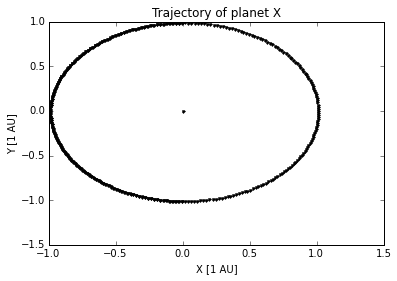

In [16]:
#  Non-optimalized Euler-Cronmer for Kepler problem

# Set of initial declaration and parameters of the problem
a = 1.0
e = 0.01
GM = 4.0*np.pi**2

N = 400
t0 = 0.0
tend = 1.5
t = np.linspace(t0,tend,N)
h = (tend-t0)/N
x = np.zeros((N,2))
v = np.zeros((N,2))


# Function g(x,t) 
def f(v_local):
    return np.array([h*v_local[0],h*v_local[1]])

# Function f(v,t) 
def g(x_local):
    radius = np.sqrt(x_local[0]**2+x_local[1]**2)
    tau = -GM/radius**3
    return np.array([h*tau*x_local[0],h*tau*x_local[1]])

# Euler integration method
def euler_vec(f, g, x, v, t, h):
    x[0,0] = 0.0
    x[0,1] = a*(1-e)
    v[0,0]= -np.sqrt(GM/a*(1+e)/(1-e))
    v[0,1] = 0.0
    
    x_buf = np.zeros(2)
    v_buf = np.zeros(2)
    
    # Solution
    for i in range(N-2):
        x_buf[:] = x[i,:]
        v_buf[:] = v[i,:]
        v[i+1,:] = v_buf[:] + g(x_buf[:])
        v_buf[:] = v[i+1,:]
        x[i+1,:] = x_buf[:] + f(v_buf[:])
    return x,v

solution_x,solution_v = euler_vec(f,g,x,v,t,h)

plt.title('Trajectory of planet X')
plt.xlabel('X [1 AU]')
plt.ylabel('Y [1 AU]')
plt.plot(solution_x[:,0],solution_x[:,1],'k.')

Jak je patrné, tato drobná úprava vedla ke stabilizaci numerického řešení, a to navíc aniž bychom byli nuceni měnit velikost časového kroku. Je také nutné zmínit, že se stále jedná o **metodu I. řádu**. Takto upravené numerické schéma zachovává energii v systému, patří tedy do třídy takzv. *symplektických* integrátorů (viz. [Euler-Cromer](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)). Pro zajímavost, tato vlastnost, tedy stabilizace numerického schématu (metody řešení) použitím *implicitních* hodnot poznáme detailnějí při studiu řešení parciálních diferenciálních rovnic.

### Aktivity
* Modifikujte Eulerovo-Cromerovo schéma tak, aby byla jako implicitní hodnota použita nikoliv rychlost, ale poloha. Otestujte stabilitu této metody
* Modifikujte zadání *Keplerovy úlohy*, tak aby výsledný pohyb tělesa byl eliptický

# Metody vyšších řádů

Vyjdeme opět z *Cauchyho úlohy*

$$
\frac{{\rm d}y}{{\rm d}x} = f(t,y)\quad t_0 \leq t \leq t_{\rm end} \quad y(t_0) = y_0
$$

Abychom určili řešení v čase následujícím kroku $y(t+h)$, předpokládejme řešení ve tvaru 

$$
y(t+h) = y(t)+c_0f(t,y)h+c_1f[t+ph,y+qhf(y,t)]h
$$

Naším úkolem tedy bude určit vztahy mezi koeficienty $c_0,c_1,p,q$. K tomu nám postačí nejprve vyjádřit $y(t+h)$ s pomocí Taylorova rozvoje okolo bodu $t$

$$
y(t+h) = y(t) + f(y,t)h + \frac{1}{2}\left(\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\right)h^2+\mathcal{O}(h^3).
$$

Následně určíme $f[t+ph,y+qhf(y,t)]$ s pomocí Taylorova rozvoje okolo bodu $(t,y)$

$$
f[t+ph,y+qhf(y,t)]=f(t,y)+\frac{\partial{f}}{\partial t}ph+\frac{\partial f}{\partial y}qh+\mathcal{O}(h^2),
$$

který dosadíme do předpokládaného řešení. Obdržíme

$$
y(t+h) = y(t)+(c_0+c_1)f(t,y)h+c_1\left(\frac{\partial f}{\partial t}p+\frac{\partial f}{\partial y}q\right)h^2+\mathcal{O}h^3
$$

Srovnáním takto upraveného předpokládaného řešení s tvarem funkce $y(t+h)$ určené z výše zmíněného Taylorova rozvoje  dostaneme hledané vztahy

$$
c_0+c_1 = 1 \\
c_1 p = \frac{1}{2} \\
c_1 q = \frac{1}{2}
$$

Z těchto podmínek je patrné, že máme určitou volnost při volbě parametrů. Jejich volba pak určuje použitou metodu. Rozlišujeme tyto metody

* *Modifikovaná Eulerova metoda* : $c_0 = 0,\, c_1 = 1,\, p = \frac{1}{2},\, q = \frac{1}{2}$
* *Heunova metoda* : $c_0 = \frac{1}{2},\, c_1 = \frac{1}{2},\, p = 1,\, q = 1$
* *Ralstonova metoda* : $c_0 = \frac{1}{3},\, c_1 =\frac{2}{3},\, p = \frac{3}{4},\,q = \frac{3}{4}$

Všechny tyto metody řadíme do třídy metod *Runge-Kutta* druhého řádu. Odvození metod třetího, čtvrtého a vyšších řádů je analogické, je nutné zahrnout více členů. Samotné odvození je zdlouhavé a nám postačí pro ilustraci výše uvedené metody.

### Aktivity
* Naprogramujte všechny výše uvedené varinaty *Rungeovy-Kutovy* metody druhého řádu, aplikujte na Keplerův problém a srovnejte řešení se symplektickým integrátorem

## Problém: Mapování fázového prostoru matematického kyvadla

Diferenciální rovnici popisující matematické kyvadlo znají asi všichni, provází studenta studiem od prvních počátků na škole
$$
\frac{\rm d \theta}{{\rm d}t}= \omega \\
\frac{\rm \omega}{{\rm d} t} = -\frac{g}{l}\sin(\theta)
$$

Naším úkolem bude zmapovat fázový prostor generovaný takovýmto dynamickým systémem.

### Algoritmus:
* Vygenerujeme sadu náhodných počátečních podmínek $(\theta,\omega)$
* Pro každou sadu těchto podmínek vyřešíme soustavu dvou diferenciálních rovnic, popisujících matematické kyvadlo 
* Všechna řešení vykreslíme do jednoho grafu

In [17]:

#RK2 integrator - Heunova metoda
def RK2_step( f, y, t, h ):
    #Creating solutions
    K0 = h*f(t, y)
    K1 = h*f(t + 0.5*h, y + 0.5*K0)
    y1 = y + K1
    #Returning solution
    return y1


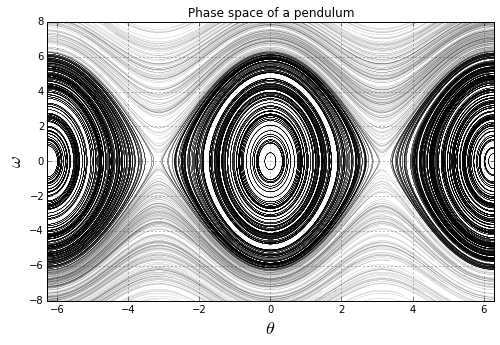

In [18]:
#========================================================
#Defining parameters
#========================================================
#Gravity
g = 9.8
#Pendulum's lenght
l = 1.0

#Number of initial conditions
Nic = 1000
#Maxim angular velocity
omega_max = 8

#Maxim time of integration
tmax = 6*np.pi
#Timestep
h = 0.01

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

#========================================================
#Generating set of initial conditions
#========================================================
theta0s = -4*np.pi + np.random.random(Nic)*8*np.pi
omega0s = -omega_max + np.random.random(Nic)*2*omega_max


#========================================================
#Integrating and plotting the solution for each IC
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(theta0s, omega0s):
    #Arrays for solutions
    time = [0,]
    theta = [theta0,]
    omega = [omega0,]
    for i, t in zip(xrange(int(tmax/h)), np.arange( 0, tmax, h )):
        #Building current condition
        y = [theta[i], omega[i]]
        #Integrating the system
        thetai, omegai = RK2_step( function, y, t, h )
        #Appending new components
        theta.append( thetai )
        omega.append( omegai )
        time.append( t )
    #Plotting solution
    plt.plot( theta, omega, lw = 0.1, color = "black" )
    
#Format of figure
plt.xlabel( "$\\theta$", fontsize = 18 )
plt.ylabel( "$\omega$", fontsize = 18 )
plt.xlim( (-2*np.pi, 2*np.pi) )
plt.ylim( (-omega_max, omega_max) )
plt.title( "Phase space of a pendulum" )
plt.grid(1)



### Rungeova-Kuttova metoda 4. řádu

V praxi nejpoužívanější metodou pro řešení soustavy ODE, plně postačující i pro řešení dynamických systémů vykazujících chaos je *Rungeova-Kuttova metoda 4. řádu*. Jak jsme již naznačili výše, její odvození je podobné jako u metody druhého řádu, je však zapotřebí započíst členy vyšších řádů. Odvození je zdlouhavé, lze ho nalézt na [Rungeova-Kuttova metoda 4.řádu](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge.E2.80.93Kutta_fourth-order_method)

Řešení $y(t+h)$ v následujícím časovém kroku předpokládáme ve tvaru

$$
y(t+h) = y(t)+\frac{1}{6}\left(K_0+2K_1+2K_2+K_3\right)
$$

kde 

$$
K_0 = hf(t,y) \\
K_1 = hf\left(t+\frac{h}{2},y+\frac{K_0}{2}\right) \\
K_2 = hf\left(t+\frac{h}{2},y+\frac{K_1}{2}\right) \\
K_3 = hf\left(t+\frac{h}{2},y+K_2\right)
$$

### Aktivity

* Použijte *Rungeovu-Kuttovu* metodu 4. řádu na řešení soustavy 

$$
\frac{{\rm d} x}{{\rm d}t}=a(y-x) \\
\frac{{\rm d} y}{{\rm d}t}=x(b-z)-y \\
\frac{{\rm d} z}{{\rm d}t}=xy-cz
$$

* Vykreslete stavový portrét pro hodnoty parametru $a=10,\, b=28,\, c=8/3$. Počáteční podmínky zvolte náhodně. Tento systém poprvé prezentoval Edward Lorenz, jako zjednodušený model počasí, který přes svoji jednoduchost vykazuje komplexní složitost resp. chaotické chování (viz. [Lorenzův systém](https://en.wikipedia.org/wiki/Lorenz_system)). Stavový portrét tvoří [podivný atraktor](https://en.wikipedia.org/wiki/Attractor)

* S použitím animace trajektorie ve stavovém portrétu ukažte, že *Lorenzův chaotický atraktor* ma vlastnost přitažlivosti, tedy že přes různé startovací počáteční podmínky je řešení přitahováno na oblast atraktoru.

# Metody řešení okrajových úloh ODE

Mějme zadanou okrajovou úlohu ve formě $N$ diferenciálních rovnic prvního řádu

$$
\frac{{\rm d}y_i(x)}{{\rm d}x}=g_i(x,y_1,y_2,\dots,y_{\rm N}) \quad i=1,\dots,N
$$

V bodě $x_1$ řešení musí splňovat podmínku

$$
B_{1j}(x_1,y_1,y_2,\dots,y_N)=0\quad j=1,\dots,n_1
$$

a v bodě $x_2$ podmínky 

$$
B_{2k}(x_2,y_1,y_2,\dots,y_N)=0 \quad k=1,\dots,n_2
$$

Zásadní rozdíl oproti předchozí úloze tedy spočíva v neznalosti počáteční podmínky pro derivaci stavové veličiny. Místo ní známe druhou okrajovou podmínku. Řešení lze hledat několika způsoby, uvedeme si základní dva způsoby

## Metoda střelby

Nejjednodušší způsob spočívá v převodu na problém počáteční úlohy. K tomu nám postačí jediné, sofistikovaný odhad
Vše si názorně ilustrujeme na příkladu obyčejné diferenciální rovnice II. řádu

$$
y''(x) = f(x,y(x),y'(x))
$$

s okrajovými podmínkami

$$
y(x_0) = y_a = a \quad y(x_n) = y_b = b
$$

Abychom okrajovou úlohu převedli na počáteční problém, je potřeba určit $y'(x_0)$. Tato hodnota není zadaná, takže ji určíme odhadem, například na základě nějakých dodatečných informací (v podstatě vystřelíme od boku). Tedy náš první odhad je

$$
y'(x_0) = {y}_1'(x_0) 
$$

Pro takto zvolenou hodnotu vyřešíme výše uvedenou počáteční úlohu a porovnáme vypočítanou hodnotu $y_1(x_n)$ s okrajovou podmínkou $y_b$. Pokud platí

$$
y_1(x_n) = y_b
$$

pak je úloha vyřešena, v opačném případě postup zopakujeme ale s jiným odhadem počáteční podmínky $y_2'(x_0)$ (vystřelíme jiným směrem). Pokud ani potom neplatí, že $y_2(x_n) = y_b$ určíme další odhad (směr střelby) na základě hodnot z předchozích kroků a to lineární interpolací. Pokud platí, že

$$
y_1(x_n) < y_b < y_2(x_n)
$$

pak existuje takové číslo $\lambda$, že

$$
\lambda y_1(x_n) + (1-\lambda)y_2(x_n) = y_b
$$

Z čehož plyne pro následující odhad (směr střelby) vztah

$$
y_3'(x_0) = \lambda y_1'(x_0)+(1-\lambda)y_2'(x_0)
$$

Pokud je původní diferenciální rovnice II. řádu lineární, pak je třetí odhad již konečný a

$$
y_3(x_n) = y_b,
$$

Pokud však rovnice není lineární, je zapotřebí iterativní postup, který jednoduše odvodíme z předchozích vztahů. Nejprve si vyjádříme $\lambda$ pro následující odhad a to s použitím předchozích dvou odhadů

$$
\lambda = \frac{y_b - y_{j-1}(x_n)}{y_{j-2}(x_n)-y_{j-1}(x_n)}
$$

který pak použijeme pro určení následující hodnoty

\begin{align}
y_j'(x_0) & = \frac{\left(y_b - y_{j-1}(x_n)\right)y_{j-2}(x_n)+\left(y_{j-2}(x_n)-y_{j-1}(x_n)-(y_b-y_{j-1}(x_n)\right)}{y_{j-2}(x_n)-y_{j-1}(x_n)} \\
& = \frac{y_{j-2}'\left(y_b-y_{j-1}(x_n)\right)+y_{j-1}'\left(y_{j-2}(x_n)-y_b\right)}{y_{j-2}(x_n)-y_{j-1}(x_n)}
\end{align}

Pokud metoda konverguje, konvergují vypočítané hodnoty $y_j(x_n)$ k požadované hodnotě $y_b$. Výpočet provádíme do doby dosažení požadované tolerance $\varepsilon$, tedy

$$
|y_j(x_n)-y_b| < \varepsilon
$$

Celý problém můžeme přeformulovat na hledání kořene rovnice


### Aktivity

* Řešte okrajovou úlohu $y''=\sqrt{y'^2+1}$ s podmínkou $y(0)=2$ a $y(1)=1$.
* Řešte stejnou úlohu ale s okrajovými podmínkami $y(0) = 2$ a $y'(1) = 0$

## Metoda konečných diferencí - implicitní formulace

Vyjdeme z předpokladu úlohy popsané lineární diferenciální rovnici II. řádu

$$
y'' + p(x)y'+q(x)y = f(x)
$$

a s okrajovými podmínkami

$$
y(a) = y_a \quad y(b) = y_b
$$

zároveň předpokládáme, že okrajová úloha má právě jedno řešení na intervalu $\left<a,b\right>$. V diskrétní reprezentaci o $N$ prvcích je nezávislá veličina $x$ dána sadou ekvidistantních diskrétních hodnot s krokem $h$

$$
a = x_0 < x_1 \dots x_{j}\dots x_{N-1}< x_N = b 
$$

jimž přísluší diskrétní hodnoty závislé veličiny a jejich derivace $y_j,\,y_j',\,y_j''$. Základní princip metody spočívá v aproximaci derivace s pomocí diferenčních vztahů a to implicitním způsobem. Konkrétně v našem případě použijeme aproximací druhého řádu s použitím vztahu pro centrální diferenci

\begin{align}
y_j' & \approx \frac{y_{j+1}-y_{j-1}}{2h} \\
y_j'' & \approx \frac{y_{j-1}-2y_j+y_{j+1}}{h^2}
\end{align}

Tyto vzorce lze jednoduše určit z Taylorova rozvoje v bodech $y_{j-1}$ a $y_{j+1}$ a to podobným způsobem, který jsme použili při odvozování * Eulerovy metody * pro řešení obyčejných diferenciálních rovnic. Aplikací těchto vztahů můžeme původní soustavu přepsat na soustavu lineárních rovnic pro neznáme hodnoty $y_0,y_1,\dots,y_n$, přičemž hodnoty $y_0$ a $y_n$ jsou určeny z okrajových podmínek.

\begin{align}
\left(h^2q_1-2\right)y_1+\left(1+\frac{hp_1}{2}\right)y_2 & = h^2 f_1 - \left(1-\frac{hp_1}{2}\right)y_a \\
\vdots \\
\left(1-\frac{hp_j}{2}\right)y_{j-1}+ \left(h^2q_j-2\right)y_j+\left(1+\frac{hp_j}{2}\right)y_{j+1} & = h^2 f_j \\
\vdots \\
\left(1-hp_{n-1}\right)y_{n-2}+\left(h^2q_{n-1}-2\right)y_{n-1} & = h^2f_{n-1} - \left(1+\frac{hp_{n-1}}{2}\right)y_b
\end{align}

pokud označíme

\begin{align}
1-\frac{hp_j}{2} & = a_j \\
h^2 q_i - 2 & = b_i \\
1+\frac{hp_i}{2} & = c_i \\
h^2 f_i & = d_i
\end{align}

kde $p_i,q_i,f_i$ jsou hodnoty funkcí v bodě $x_i$, dostáváme *tridiagonální soustavu* lineárních rovnic.

\begin{align}
\left(
\begin{matrix}
b_1 & c_1 & 0    &  &  &  & \\
a_2 & b_2 & c_2  &  0  &  & \\
& \ddots & \ddots & \ddots & & \\
& & a_{n-1} & b_{n-1} & c_{n-1} & & \\ 
& & & & a_n & b_n 
\end{matrix}
\right)
\left(
\begin{matrix}
y_1 \\
y_2 \\
\vdots \\
y_{n-1} \\
y_{n}
\end{matrix}
\right)=
\left(
\begin{matrix}
d_1 \\
d_2 \\
\vdots \\
d_{n-1} \\
d_n
\end{matrix}
\right)
\end{align}

### Algoritmus řešení
* Převést s pomocí metody konečných diferencí lineární diferenciální rovnici na soustavu lineárních rovnic
* Vytvořit příslušné matice včetně pravé strany
* Vyřešit soustavu lineárních rovnic algebraickými postupy (viz. [numpy.linalg](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html) )

### Problém
Máme zadanou lineární diferenciální rovnici

$$
y'' + xy' - 2y = -1.5
$$

s okrajovými podmínkami $y(0)=1$ a $y(1)=1.25$.

### Aktivity

* Tlustý válec uchovává kapalinu o teplotě 0° C. Ve stejnou dobu je válec ponořen do lázně o teplotě 200° C. Diferenciální rovnice popisující ustálenou tepelnou kondukci je dána

$$
\frac{{\rm d}^2 T}{{\rm d}r^2} = -\frac{1}{r}\frac{{\rm d}T}{{\rm d}r}
$$

s okrajovými podmínkami $T(a)=200$ a $T(a/2)=0$, kde $a$ je poloměr válce. Určete teplotní profil ve válci s pomocí *metody konečných diferencí* a porovnejte je s analytickým řešením

$$
T = 200\left(1-\frac{\ln{r/a}}{\ln{0.5}}\right)
$$

## Hvězdná Stavba - Bílý trpaslík

<img src="./images/white_dwarf.jpg" width=400 height=400 align="right">
Rovnice popisující stavbu bílého trpaslíka dostaneme kombinací rovnice hydrostatické rovnováhy

$$
\vec{\nabla} P = \rho \vec{g}
$$

a Poissonovy rovnice

$$
\vec{\nabla}.\vec{g} = -4\pi G \rho
$$

ve sférické symetrii. Výsledná rovnice pro vnitřní stavbu hvězdy

$$
\frac{1}{r^2}\frac{{\rm d}}{{\rm d}r}\left(\frac{r^2}{\rho}\frac{{\rm d}P}{{\rm d}r}\right) = -4\pi G \rho
$$

pak vede k *Laneově-Emdenově* rovnici pro polytropickou tekutinu. Polytropická tekutina znamená, že stavovou rovnici lze napsat ve tvaru

$$
\rho = K \rho^{1+1/n}
$$

kde $P$ je tlak a $\rho$ hustota tekutiny. Stavovou rovnici pro bílého trpaslíka popisující *Fermiho* tlak kompletně degenerovaného elektronového plynu lze popsat polytropou. Máme dvě možnosti

* **Nerelativistický plyn**

$$
P_N = \frac{h^2}{20 m_e}\left(\frac{3}{\pi}\right)^{2/3} \frac{1}{{2m_p}^{5/3}}\rho^{5/3} = K_N \rho^{5/3}
$$

kde $K_N = 3.166.10^{12}$ [CGS] a

* **Relativistický plyn**

$$ 
P_R = \frac{hc}{8}\left(\frac{3}{\pi}\right)^{2/3}\frac{1}{{2m_p}^{4/3}}\rho^{4/3} = K_R \rho^{4/3}
$$

kde $K_R = 4.936.10^{14}$ [CGS]. Nás bude zajímat obecný případ, proto obě rovnice zkombinujeme do jednoho vztahu 

$$
P = \frac{P_N P_R}{\sqrt{P_R^2+P_N^2}},
$$

který lze po dosazeni obou verzí stavových rovnic upravit dále na

$$
P = \frac{K_N \rho^{5/3}}{\left[1+\left(\frac{\rho}{\rho_0}\right)^{2/3}\right]^{1/2}}.
$$

Zde $\rho_0$ označuje charakteristickou hustotu, která odděluje oba tyto režimy

$$
\rho_0 = \left(\frac{K_R}{K_N}\right)^3 = 3.789.10^6\,{\text{ [CGS]}}.
$$

Dosazením vztahů pro $P_N$ a $P_R$ lze dále upravit

$$
P = \frac{P_N}{\sqrt{1+\frac{P_R}{P_N}}} = \frac{K_N\rho^{5/3}}{\left[1+\left(\frac{\rho}{\rho_0}\right)^{2/3}\right]^{-1/2}}
$$

Nyní přejdeme k bezrozměrné formulaci úlohy, nejprve hustotu vyjádříme s pomocí charakteristické hustoty $\rho_0$ a bezrozměrné veličiny $\theta$

$$
\rho = \rho_0 \theta(r).
$$

Dále radiální vzdálenost převedeme na bezrozměrnou veličinu s pomocí normalizačního parametru $a$ a normalizované radiální vzdálenosti $r_n$ na

$$
r = a r_n \quad {\rm d}r =  a {\rm d}r_n
$$

Přepíšeme rovnici pro vnitřní stavbu s použitím obecné rovnice pro tlak a využitím bezrozměrných veličin

$$
\frac{1}{r_n^2 a^2} \frac{1}{a} \frac{\rm d}{{\rm d}r_n}\left[r_n^2 a^2 \frac{1}{\rho_0 \theta}\frac{1}{a}\frac{\rm d}{{\rm d}r_n}\left(K_N\rho_0^{5/3}\theta^{5/3}(1+\theta^{2/3}\right)^{-1/2}\right] = -4\pi G \rho_0\theta 
$$

a všechny konstanty dáme před závorky

$$
\frac{K_N}{4\pi G a^2 \rho_0^{1/3}}\frac{1}{r_n^2}\frac{\rm d}{{\rm d}r_n}\left[\frac{r_n^2}{\theta}\frac{\rm d}{{\rm d}r_n}\left(\theta^{5/3}(1+\theta^{2/3})\right)^{-1/2}\right] = -\theta
$$

Z toho plyne i vhodná volba normalizační konstanty pro radiální vzdálenost $a$

$$
a = \sqrt{\frac{K_N}{4\pi G \rho_0^{1/3}}} = 1.55525378.10^8\, {\text{[CGS]}}
$$

což vede k výsledné obecné rovnici pro stavbu bílého trpaslíka 

$$
\frac{1}{r_n^2}\frac{\rm d}{{\rm d}r_n}\left[\frac{r_n^2}{\theta}\frac{\rm d}{{\rm d}r_n}\left(\theta^{5/3}(1+\theta^{2/3})\right)^{-1/2}\right] = -\theta
$$

Vidíme, že se již nejedná o rovnici typu *Lane-Emden* ale je ji velmi podobná. Příčinou této změny byl obecnější nepolytropický tvar stavové rovnice, kombinující jak relativistický, tak nerelatisvistický případ. Jedná se o rovnici druhého řádu, pro numerické řešení je vhodné ji transformovat do soustavy dvou rovnic prvního řádu. Zavedeme substituce

\begin{align}
\frac{{\rm d}\theta}{{\rm d}r_n} & = V \\
\frac{{\rm d}V}{{\rm d}r_n} & = f(V,\theta,r_n)
\end{align}

Tvar funkce zjistíme provedením derivací v rovnici stavby bílého trpaslíka a to v obou závorkách. Tady si trochu pomůžeme s pomocí balíku [Sympy](http://docs.sympy.org/0.7.1/tutorial.html)

In [58]:
from sympy import *
x = symbols("x")
theta = Function('theta')(x)
A = theta**(Rational(5,3))*(1+theta**(Rational(2,3)))**(Rational(-1,2))
pprint((diff(A,x)))

   2/3    d            4/3    d        
5⋅θ   (x)⋅──(θ(x))    θ   (x)⋅──(θ(x)) 
          dx                  dx       
────────────────── - ──────────────────
     _____________                  3/2
    ╱  2/3             ⎛ 2/3       ⎞   
3⋅╲╱  θ   (x) + 1    3⋅⎝θ   (x) + 1⎠   


Tím jsme provedli první derivaci, ještě ji podělíme členem $\theta$, upravíme s využitím substituce $v$ a označíme pro další potřebu člen

$$
B = \frac{5}{3}\theta^{-1/3}(1+\theta^{2/3})^{-1/2}-\frac{1}{3}\theta^{1/3}(1+\theta^{2/3})^{-3/2}
$$

Budem pokračovat a provedem vnější derivaci výrazu v závorce

$$
\frac{{\rm d}\left(r_n^2 V B\right)}{{\rm d}r_n} = 2 r_n V B +r_n^2 \frac{{\rm d}V}{{\rm d}r_n} B + r_n^2 V \frac{{\rm d}B}{{\rm d}r_n}
$$

S posledním výrazem si opět trochu pomůžeme s pomocí symbolických výpočtů

In [59]:
B1 = Rational(5,3)*theta**Rational(-1,3)*(1+theta**Rational(2,3))**Rational(-1,2)
B2 = -Rational(1,3)*theta**Rational(1,3)*(1+theta**Rational(2,3))**Rational(-3,2)

B = (B1+B2)
pprint((diff(B,x)))

            d                            d                       d            
          5⋅──(θ(x))                   2⋅──(θ(x))                ──(θ(x))     
            dx                           dx                      dx           
- ────────────────────────── - ────────────────────────── + ──────────────────
       _____________                          3/2                          5/2
      ╱  2/3          4/3        ⎛ 2/3       ⎞     2/3        ⎛ 2/3       ⎞   
  9⋅╲╱  θ   (x) + 1 ⋅θ   (x)   3⋅⎝θ   (x) + 1⎠   ⋅θ   (x)   3⋅⎝θ   (x) + 1⎠   


Opět výraz upravíme, využijeme substituce 

$$
\frac{{\rm d}B}{{\rm d}r_n} = V C
$$

kde C je

$$
C = -\frac{5}{9}\theta^{-4/3}(1+\theta^{2/3})^{-1/2}-\frac{2}{3}\theta^{-2/3}(1+\theta^{2/3})^{-3/2}+\frac{1}{3}(1+\theta^{2/3})^{-5/2}
$$

Obdrželi jsme rovnici 

$$
\frac{1}{r_n^2}\left(2VBr_n+Br_n^2\frac{{\rm d}V}{{\rm d}r_n}+V^2Cr_n^2 \right)= -\theta
$$

ze které plyne podoba funkce

$$
f(V,\theta,r_n) = -\frac{2}{r_n}V-\frac{C}{B}V^2-\frac{1}{B}\theta
$$

Nyní máme již vše připraveno k numerickému řešení této soustavy a to jako počáteční problém se dvěma počátečními podmínkami. Předem danou hodnotou centrální hustoty $\theta_c$ vyjádřenou v jednotkách kritické hustoty $\rho_o$ a podmínkou. Integrovat budeme od středu hvězdy až k jejímu povrchu, který určíme z podmínky

$$
\rho(R) \approx 0 \quad \rightarrow \quad \theta(R) \approx 0
$$

$$
\theta(0)=\left(\frac{{\rm d}\theta}{{\rm d}r_n}\right)_0 = 0
$$

### Algoritmus
* Stanovte hodnotu $\theta_c$, uvažujte hodnotu hustoty $\rho_c$ v intervalu $10^4\,\text{[g cm]}^{-3}$ až $10^{12}\,\text{[g cm]}^{-3}$
* Zvolte integrační metodu (Runge Kutta II,IV řádu), v7počet začněte blízko centra $r_n=0.001$
* Abychom mohli stanovit hmotu hvězdy, budeme během výpočtu určovat bezrozměrnou hmotnost hvězdy, tedy integrál

$$
m = \int_0^{r_n^{\rm max}}\theta(r_n)r_n^2{\rm d}r_n.
$$

* Integrujte rovnic se zadaným krokem do doby než bude dosáhneme povrchu hvězdy. Abychom se vyhnuli numerickým obtížím, použijeme chybovou toleranci $\frac{\theta}{\theta_c} \approx 0.01$.
* Výsledné bezrozměrné veličiny převedeme z bezrozměrného tvaru do fyzikálních jednotek a vyjádříme poloměr a hmotnost hvězdy

\begin{align}
R = \frac{a}{R_\odot}r_n^{\rm max}= 0.002 r_n^{\rm max} \\
M = \frac{4\pi\rho_0 a^3}{M_{\odot}}m = 0.09 m
\end{align}



### Algoritmus řešení
* Zvolte hodnotu hustoty ve středu $\rho_s$ a tomu odpovídající hodnotu $x_{2,s}$
* Pro hodnotu $r_n = 0.01$ blízkou středu spočítejte odpovídající hodnoty $x_1,x_2$
* Pro určené počáteční podmínky integrujte soustavu dvou rovnic popisujících hvězdnou stavbu
* Integraci provádějte do doby než $x_3 < 1.$
* Interpolací určete normalizovanou radiální vzdálenost, při které $x_3 = 1$
* Přepočítejte normalizované hodnoty na skutečné a určete hmotnost bílého trpaslíka a jeho poloměr

![Chandrasekhar limit](images/chandrasekhar_limit.png)

## Aktivity
* Určete Chandrasekharovu mez hmotnosti bílého trpaslíka
* Upravte problém na okrajový volbou hmotnosti bílého trpaslíka, kterou zafixujete. Hustota ve středu trpaslíka bude počáteční podmínka, kterou budeme hledat metodou střelby


In [9]:
from __future__ import division
import numpy as np
import scipy.integrate
# Stellar model of white dwarf - solution of Lame-Emden equation

# Some predefined constant for initial value problem
# Units CGS


rho_c = 1.0e8 # Free parameter - density in the core
R_sun = 6.96e10 # constant - Solar radius
M_sun = 1.99e33 # constant  - Solar mass
rho_0 = 3.789e6 # characteristic density 
err_tol = 0.001 # tolerance for surface detection

# Initial value problem - free parameter is fixed central density 

theta_ini = rho_c/rho_0
V_ini = 0

# Initial value for scalled radius -
rn_ini = 0.01

integration_limit = err_tol*theta_ini

h = 0.0001

#RK2 integrator - Heuny method
def RK2_step( f, y, t, h ):
    #Creating solutions
    K0 = h*f(t, y)
    K1 = h*f(t + 0.5*h, y + 0.5*K0)
    y1 = y + K1
    #Returning solution
    return y1

# Right hand side of the euqations

def fun_rs(x,y):
    
    B = 5/3*y[0]**(-1/3)*(1+y[0]**(2/3))**(-1/2)-1/3*y[0]**(1/3)*(1+y[0]**(2/3))**(-3/2)
    C = -5/9*y[0]**(-4/3)*(1+y[0]**(2/3))**(-1/2)-2/3*y[0]**(-2/3)*(1+y[0]**(2/3))**(-3/2)+(1/3)*(1+y[0]**(2/3))**(-5/2)
    
    f = -2/x*y[1]-C/B*y[1]**2-1/B*y[0]
    return np.array([y[1],f])


def white_dwarf(h,theta_ini,V_ini,rn_ini):
    y = np.array([theta_ini,V_ini])

    theta_list = []
    V_list = []
    r_list = []
    m_list = []
    i = 0

    ri = rn_ini


    while (y[0] > integration_limit): 
        yi = RK2_step(fun_rs,y,ri,h)
        theta_list.append(yi[0])
        V_list.append(yi[1])
        r_list.append(ri)
        m_list.append(yi[0]*ri**2)
    
        y = yi
        ri = ri + h

    theta = np.asarray(theta_list)
    V = np.asarray(V_list)
    r = np.asarray(r_list)
    m = np.asarray(m_list)

    mi = scipy.integrate.trapz(m,dx=h)
    return mi,np.max(r),r,theta

ms,rs,r,theta = white_dwarf(h,theta_ini,V_ini,rn_ini)
M = 0.09*ms
R = 0.002*rs

print "Hmotnost trpaslika je:",M," a polomer: R",R

Hmotnost trpaslika je: 1.20057198265  a polomer: R 0.005372


![Chandrasekhar limit](images/chandrasekhar_limit.png)

## Aktivity
* Určete Chandrasekharovu mez hmotnosti bílého trpaslíka
* Upravte problém na okrajový volbou hmotnosti bílého trpaslíka, kterou zafixujete. Hustota ve středu trpaslíka bude počáteční podmínka, kterou budeme hledat metodou střelby

